<a href="https://colab.research.google.com/github/Adhya-rao/stock-manager-advance/blob/main/machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

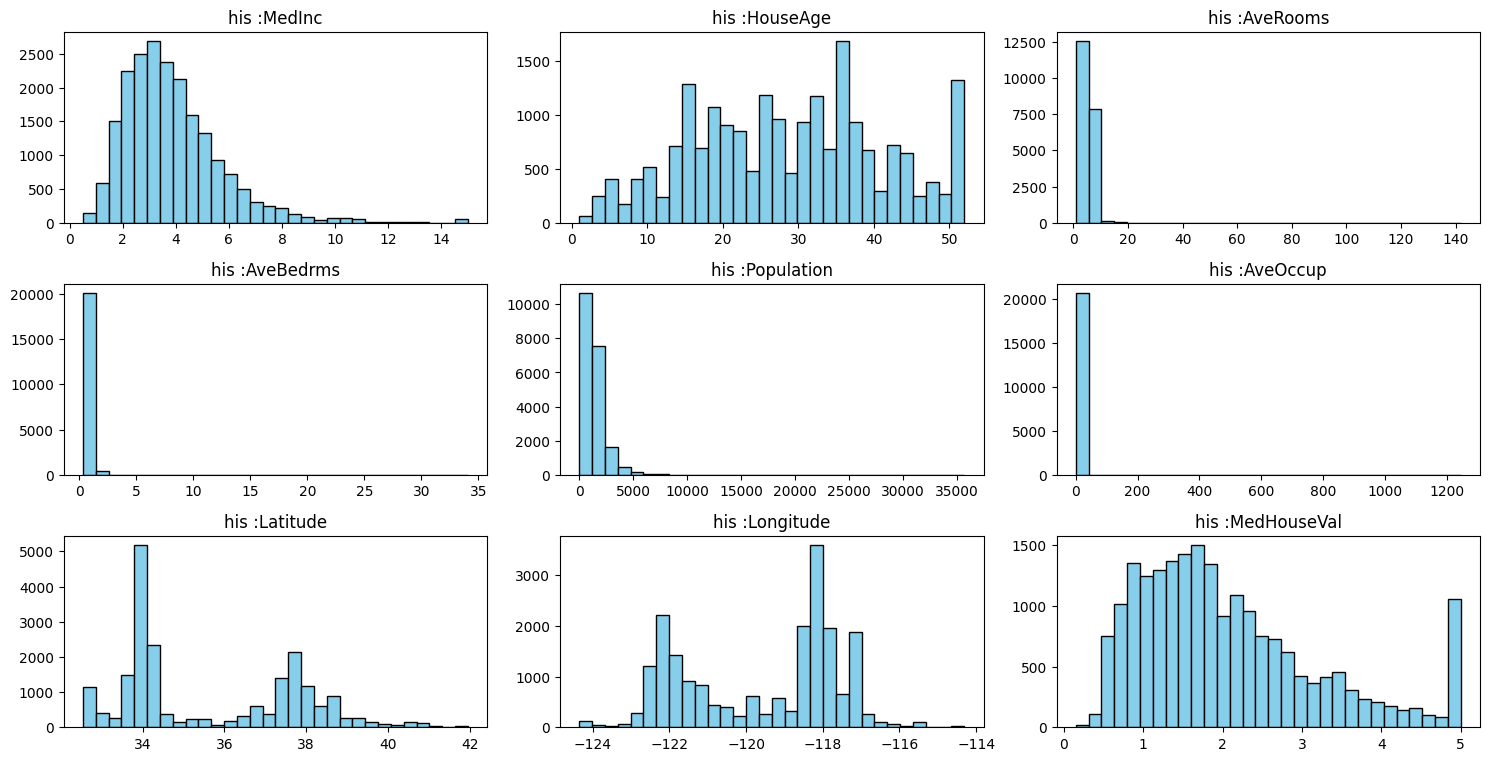

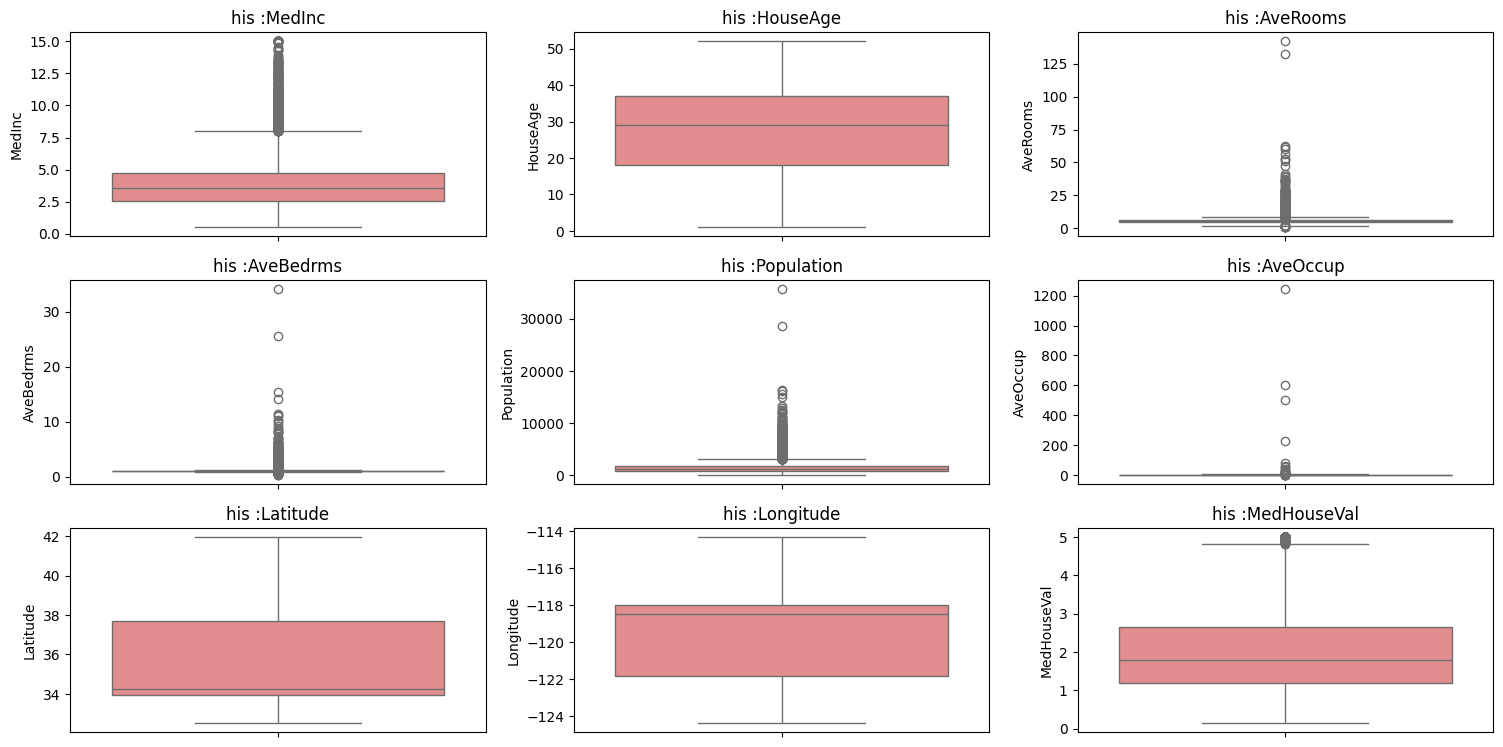

columns:MedInc
length :681
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min  

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MedHouseVal']=data.target

plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns):
  plt.subplot(4,3,i+1)
  plt.hist(df[col],bins=30,color="skyblue",edgecolor="black")
  plt.title(f"his :{col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(y=df[col],color="lightcoral")
  plt.title(f"his :{col}")
plt.tight_layout()
plt.show()


for col in df.columns:
  Q1,Q3=df[col].quantile([0.25,0.75])
  iqr=Q3-Q1
  low=Q1-1.5*iqr
  high=Q3+1.5*iqr
  outliers=df[(df[col]<low)|(df[col]>high)]
  print(f"columns:{col}")
  print(f"length :{len(outliers)}")
  print(df.describe())

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

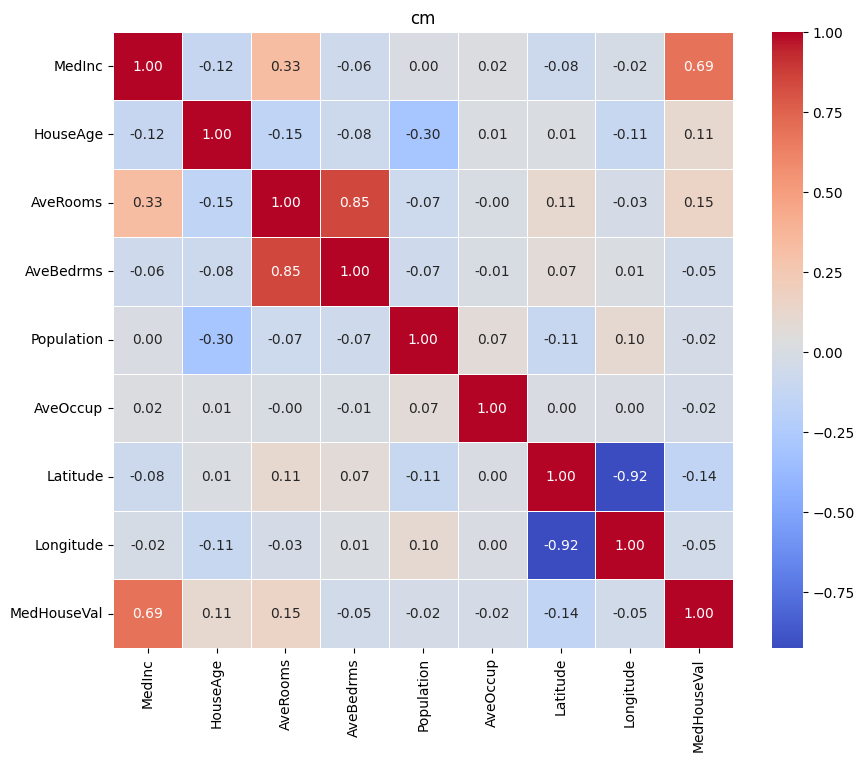

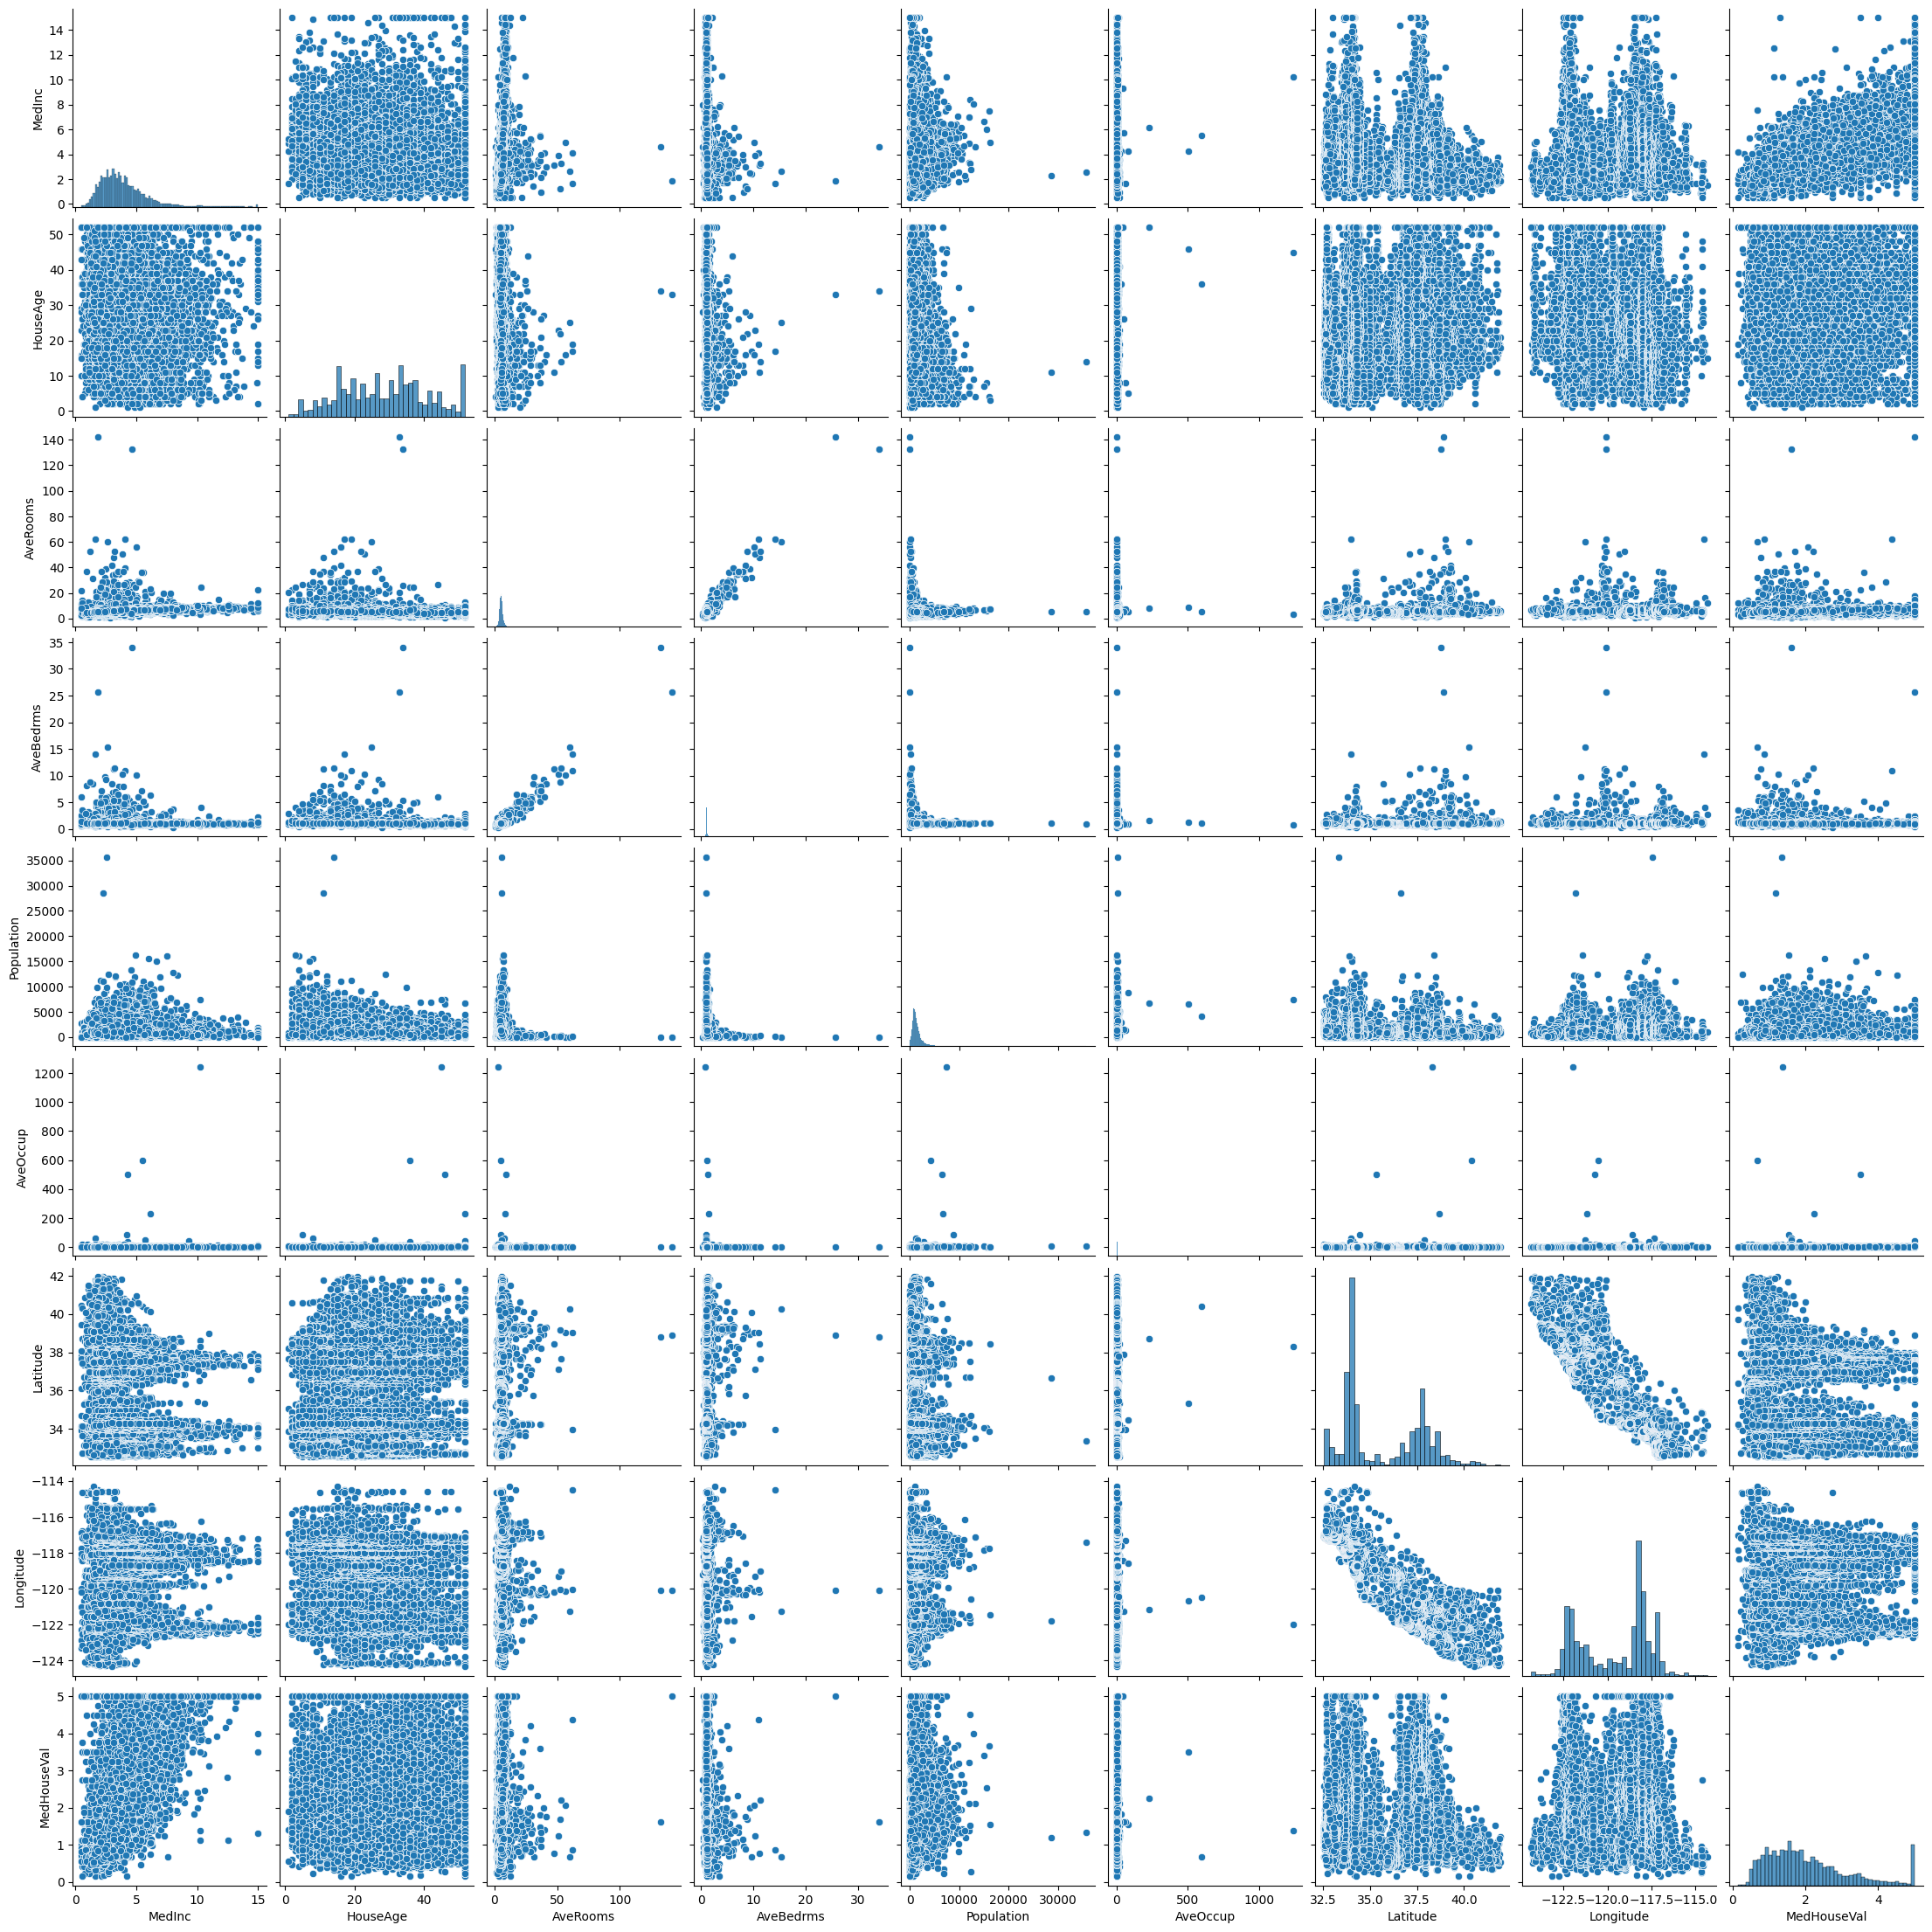

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

df=fetch_california_housing(as_frame=True).frame
corr=df.corr()
print(corr)

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title("cm")
plt.show()

sns.pairplot(df)
plt.show()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


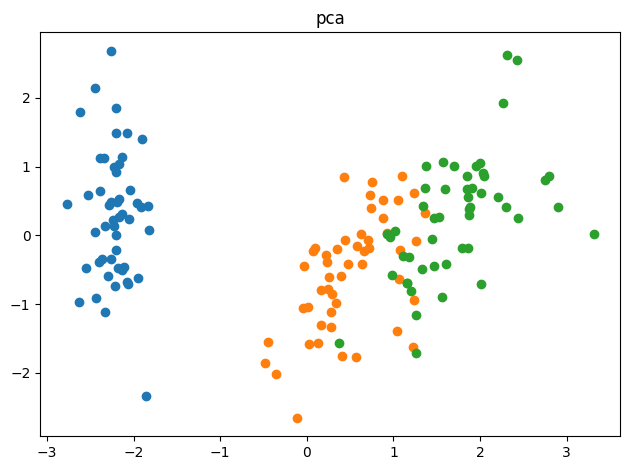

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data=load_iris()
x,y=data.data,data.target
f_n=data.feature_names
t_n=data.target_names
df=pd.DataFrame(x,columns=f_n)
df['species']=y
print(df.head())


scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
df['pc1']=x_pca[:,0]
df['pc2']=x_pca[:,1]



for i in range(3):
  plt.scatter(df[df.species==i]['pc1'],df[df.species==i]['pc2'],label=data.target_names[i])
  plt.title("pca")
plt.tight_layout()
plt.show()




In [32]:
import pandas as pd

def find_s(file_path):
  data=pd.read_csv(file_path)
  print("training data")
  print(data)

  cols=data.columns[:-1]
  label=data.columns[-1]

  hypo=['?' for _ in cols]

  for index,row in data.iterrows():
    if row[label]=="Yes":
      for i,val in enumerate(row[cols]):
        if hypo[i]=="?" or hypo[i]==val:
          hypo[i]=val
        else:
          hypo[i]='?'
  return hypo
file_path="https://raw.githubusercontent.com/Likith2000/AIML_LAB/main/findSData.csv "
final=find_s(file_path)
print(final)






training data
  Weather  Temp Humidity    Wind     B       D    C
0   Sunny  Warm   Normal  Strong  Warm    Same   No
1   Sunny  Warm     High  Strong  Warm    Same  Yes
2   Rainy  Cold     High  Strong  Warm  Change   No
3   Sunny  Warm     High  Strong  Cool  Change  Yes
['Sunny', 'Warm', 'High', 'Strong', '?', '?']


k :1
x:0.7318126914161436,pi:class1
x:0.6397186698501413,pi:class1
x:0.028294534449643582,pi:class1
x:0.676319135094341,pi:Class2
x:0.10568718308948588,pi:class1
x:0.998920113596584,pi:class1
x:0.6380453413148629,pi:class1
x:0.97409339748473,pi:class1
x:0.8671042374593522,pi:class1
x:0.4897472823261185,pi:Class2
k :2
x:0.7318126914161436,pi:class1
x:0.6397186698501413,pi:class1
x:0.028294534449643582,pi:class1
x:0.676319135094341,pi:Class2
x:0.10568718308948588,pi:class1
x:0.998920113596584,pi:class1
x:0.6380453413148629,pi:class1
x:0.97409339748473,pi:class1
x:0.8671042374593522,pi:class1
x:0.4897472823261185,pi:Class2
k :3
x:0.7318126914161436,pi:class1
x:0.6397186698501413,pi:class1
x:0.028294534449643582,pi:class1
x:0.676319135094341,pi:Class2
x:0.10568718308948588,pi:class1
x:0.998920113596584,pi:class1
x:0.6380453413148629,pi:class1
x:0.97409339748473,pi:class1
x:0.8671042374593522,pi:class1
x:0.4897472823261185,pi:Class2
k :4
x:0.7318126914161436,pi:class1
x:0.6397186698501413,p

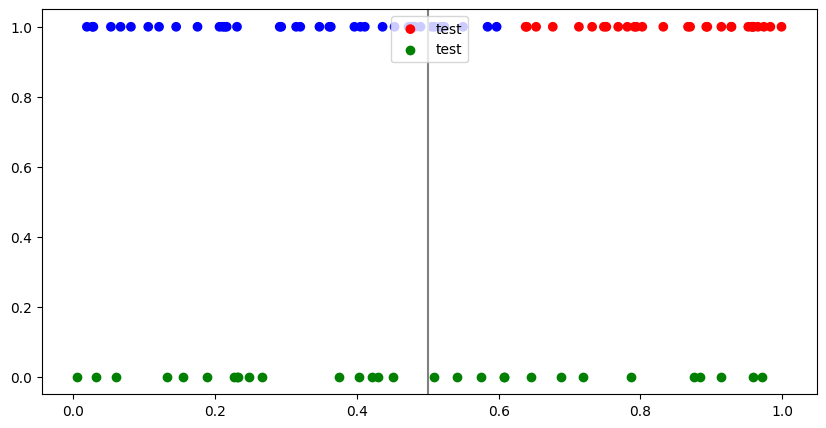

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x=np.random.rand(100)
y=np.array(['class1' if val<=0.6 else 'Class2' for val in x[:70]])
x_train,x_test=x[:70].reshape(-1,1),x[70:].reshape(-1,1)

for k in [1,2,3,4,5,20,30]:
  model=KNeighborsClassifier(n_neighbors=k).fit(x_train,y)
  preds=model.predict(x_test)
  print(f"k :{k}")
  for i,(xi,pi) in enumerate(zip(x[:10],preds),start=11):
      print(f"x:{xi},pi:{pi}")

plt.figure(figsize=(10,5))
colors=['blue' if c=="class1" else "red" for c in y]
plt.scatter(x[:70],[1]*70,color=colors,label="test")
plt.scatter(x[70:],[0]*30,color="green",label="test")
plt.axvline(0.5,color='gray')
plt.legend(loc="upper center")
plt.show()


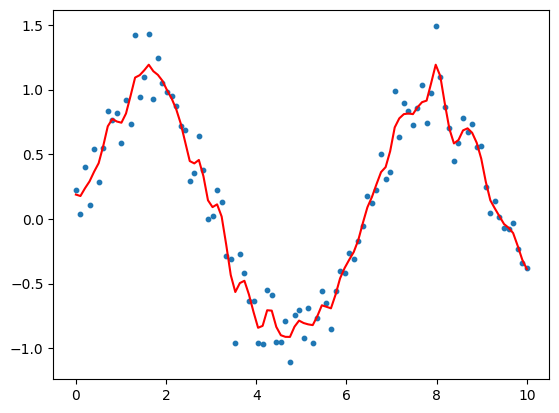

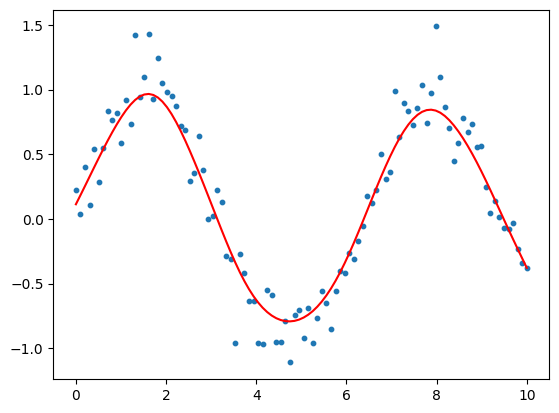

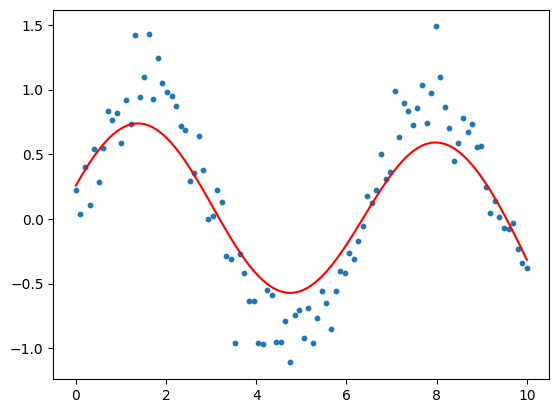

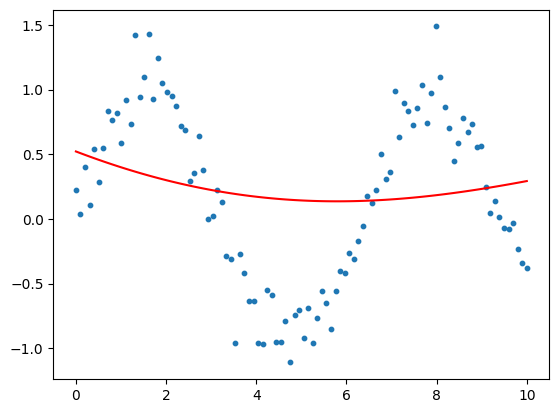

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lwr(xq,X,y,tau):
  X=np.c_[np.ones(len(X)),X]
  xq=np.array([1,xq])
  w=np.exp(-np.sum((X-xq)**2,axis=1)/(2*tau**2))
  W=np.diag(w)
  theta=np.linalg.inv(X.T@W@X)@(X.T@W@y)
  return xq @ theta
def plot_lwr(X,y,tau):
  xt=np.linspace(X.min(),X.max(),100)
  yt=[lwr(xq,X,y,tau) for xq in xt]
  plt.scatter(X,y,s=10)
  plt.plot(xt,yt,color='red')
  plt.show()
X=np.linspace(0,10,100)
y=np.sin(X)+np.random.normal(0,0.2,100)
for t in [0.1,0.5,1.0,5.0]:
  plot_lwr(X,y,t)

0.555891598695244


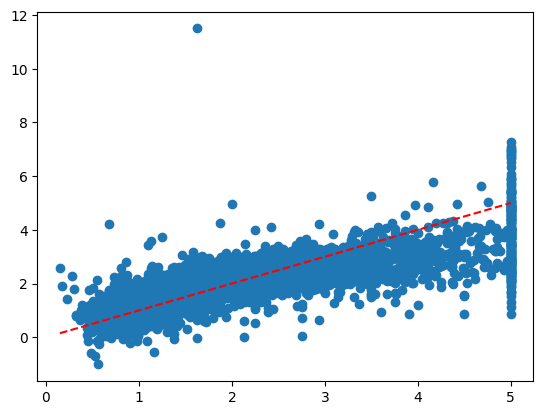

18.460267222145088


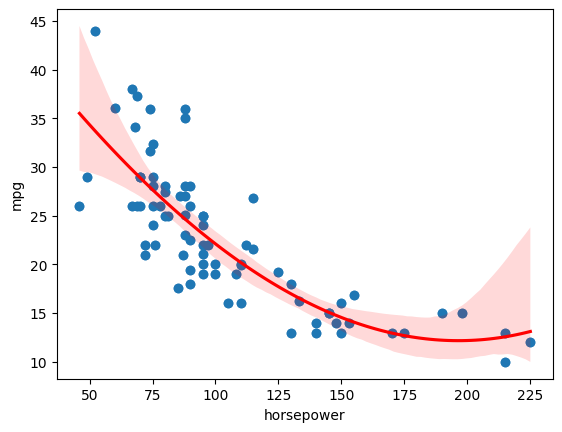

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

X,y=fetch_california_housing(return_X_y=True)
X=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression().fit(X_train,y_train)
y_pred=lr.predict(X_test)

print(f"{mean_squared_error(y_test,y_pred)}")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.show()

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv").dropna()
X=df[['horsepower']].astype(float)
y=df['mpg']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=make_pipeline(PolynomialFeatures(3),LinearRegression())
model.fit(X_train,y_train)
y_poly=model.predict(X_test)

print(f"{mean_squared_error(y_test,y_poly)}")
plt.scatter(X_test,y_test)
sns.regplot(x=X_test['horsepower'],y=y_test,line_kws={"color":"red"},order=3)

plt.show()


 acc 94.74
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[40  3]
 [ 3 68]]
Predicted class for first test sample: 1


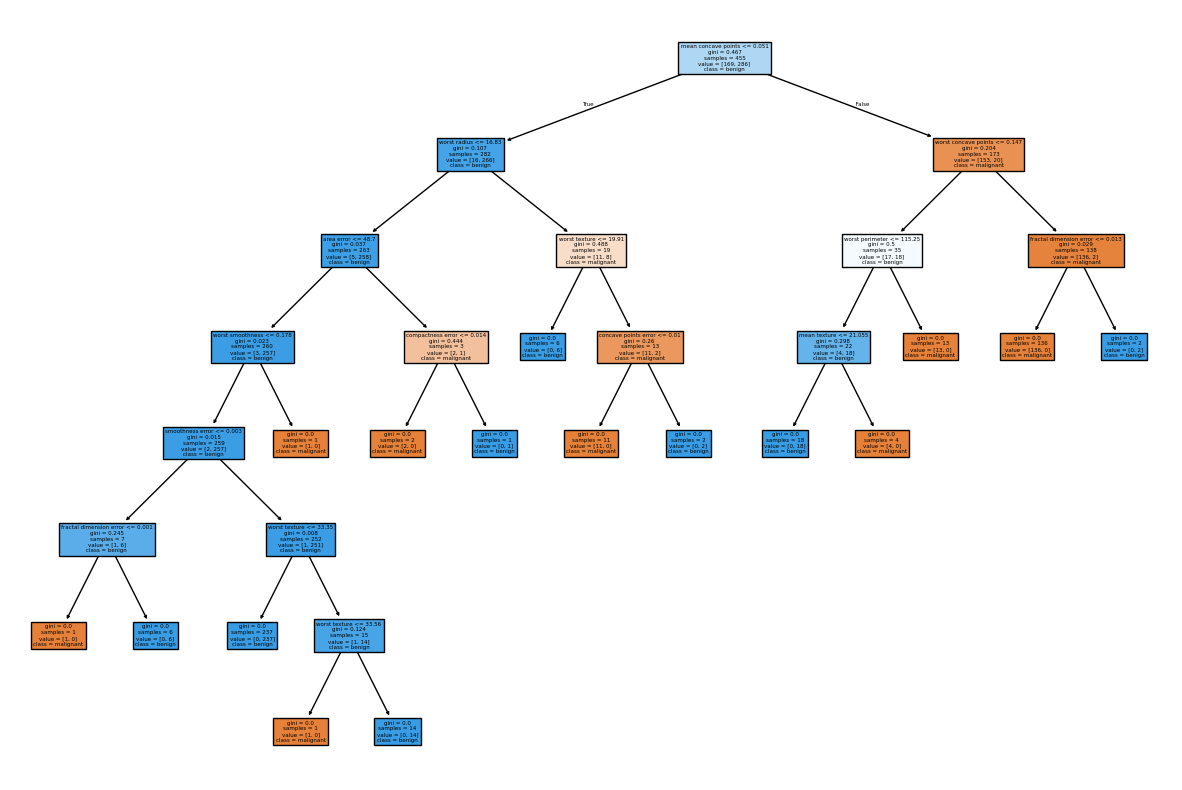

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier().fit(X_train,y_train)
y_pred=model.predict(X_test)

print(f" acc {accuracy_score(y_test,y_pred)*100:.2f}")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

new_sample=X_test[0]
print(f"Predicted class for first test sample: {model.predict([new_sample])[0]}")


plt.figure(figsize=(15,10))
plot_tree(model,filled=True,feature_names=load_breast_cancer().feature_names,class_names=load_breast_cancer().target_names)
plt.show()

 acc 77.50
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       0.33      1.00      0.50         1
           3       1.00      0.00      0.00         3
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      0.67      0.80         3
           9       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      0.67      0.57         3
          13       1.00      0.50      0.67         2
          14       1.00      0.00      0.00         4
          15       1.00      1.00      1.00         1
          16       0.67      1.00      0.80         2
          17       1.00      1.00      1.00         2
          18    

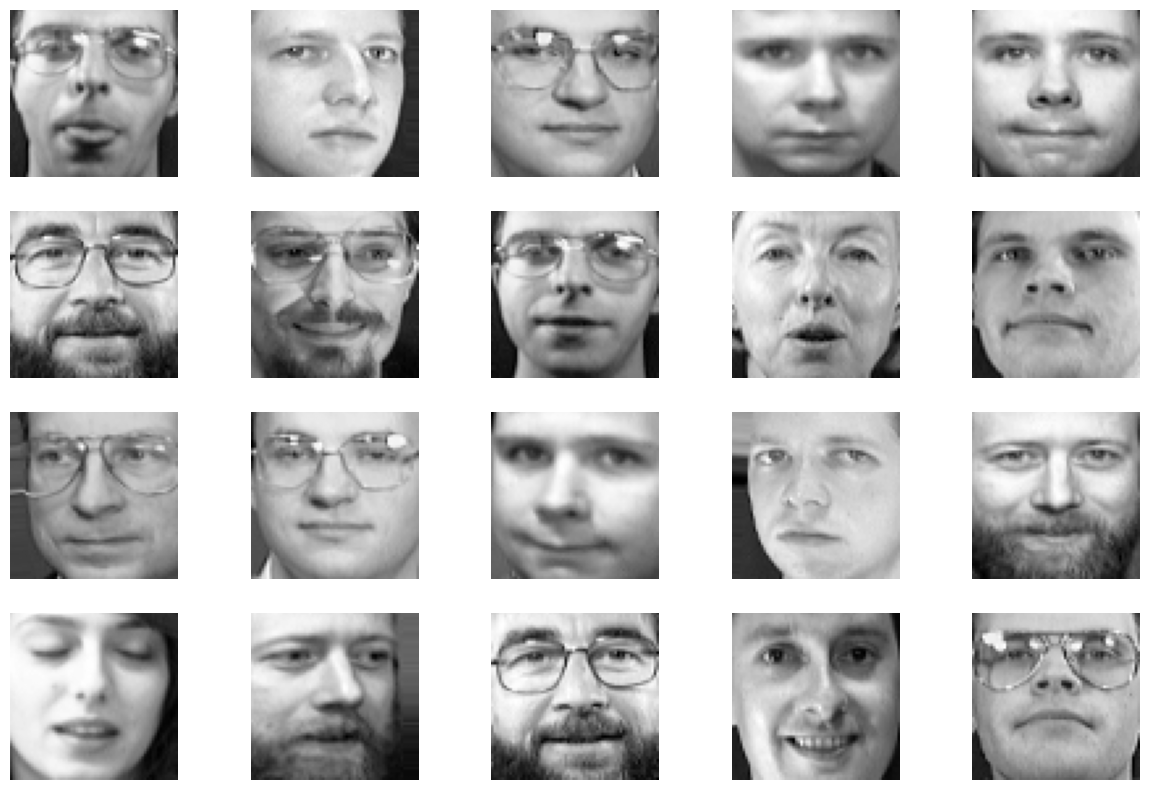

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_olivetti_faces
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

X,y=fetch_olivetti_faces(shuffle=True,random_state=42,return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=GaussianNB().fit(X_train,y_train)
y_pred=model.predict(X_test)

print(f" acc {accuracy_score(y_test,y_pred)*100:.2f}")
print(classification_report(y_test,y_pred,zero_division=1))
print(confusion_matrix(y_test,y_pred))

plt.figure(figsize=(15,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_test[i].reshape(64,64),cmap='gray')
  plt.axis('off')
plt.show()






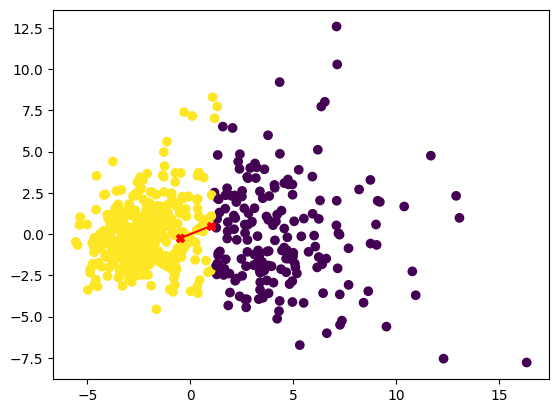

0.3447344346611054


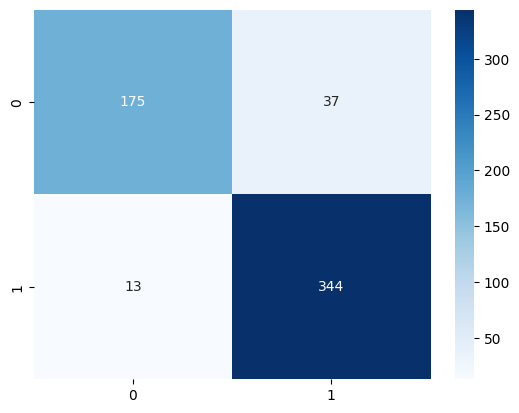

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,confusion_matrix

data=load_breast_cancer()
x,y=data.data,data.target



scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)


model=KMeans(n_clusters=2,random_state=42)
y_pred=model.fit_predict(x_scaled)

plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,cmap='viridis')
centers=model.cluster_centers_
plt.plot(centers[:,0],centers[:,1],marker="X",color="red")
plt.show()

print(silhouette_score(x_scaled,y_pred))
sns.heatmap(confusion_matrix(y,y_pred),cmap='Blues',annot=True,fmt='d')
plt.show()